# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [3]:
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [4]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
    filter(sports == 'Basketball') |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    select(year, institution_name, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** you can use `geom_col` with `x` and `y` encodings so the bar height reflects spending.)

year,men_or_women,expenditure_usd
<dbl>,<chr>,<dbl>
2015,men,1622132863
2015,women,1013740678
2016,men,1695782608
2016,women,1057390299
2017,men,1809020416
2017,women,1105637602


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


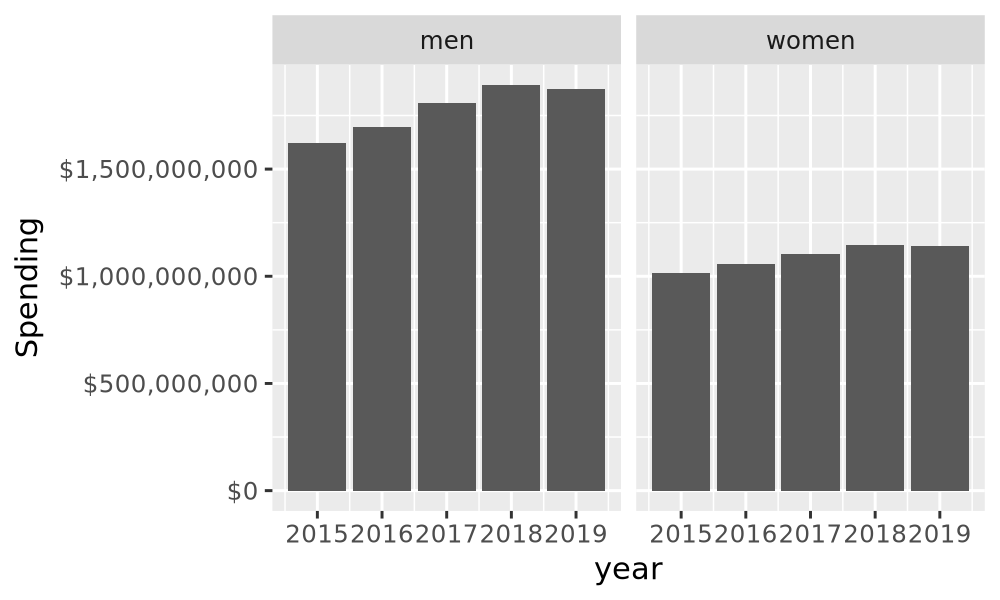

In [30]:
# bar chart code goes here

ncaa_sports_spending |> head()


options(repr.plot.res = 200, repr.plot.height = 3, repr.plot.width = 5) 


ncaa_sports_spending = ncaa_sports_spending %>% 
                         group_by(year, men_or_women) %>%
                            summarize(expenditure_usd = sum(expenditure_usd, na.rm = TRUE))

men_v_women = ggplot(ncaa_sports_spending, aes(x = year,
                                               y = expenditure_usd)) +
              geom_col(na.rm = T) +
              scale_y_continuous(labels = scales::dollar_format()) +
              facet_wrap(~men_or_women, nrow = 1) +
              labs(x = 'year', y = 'Spending')

men_v_women





You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

**Visualize the same data but this time with a line chart. Make sure your lines are "grouped" according to the `men_or_women` column.**

*Note: use the `ncaa_sports_spending2` table for the line chart! 📈*

In [6]:
# uncomment and run to produce the line chart table

ncaa_sports_spending2 = ncaa_sports_spending |>
    group_by(year, men_or_women) |>
     summarize(expenditure_usd = sum(expenditure_usd, na.rm = TRUE))

ncaa_sports_spending2 |> head()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,men_or_women,expenditure_usd
<dbl>,<chr>,<dbl>
2015,men,1622132863
2015,women,1013740678
2016,men,1695782608
2016,women,1057390299
2017,men,1809020416
2017,women,1105637602


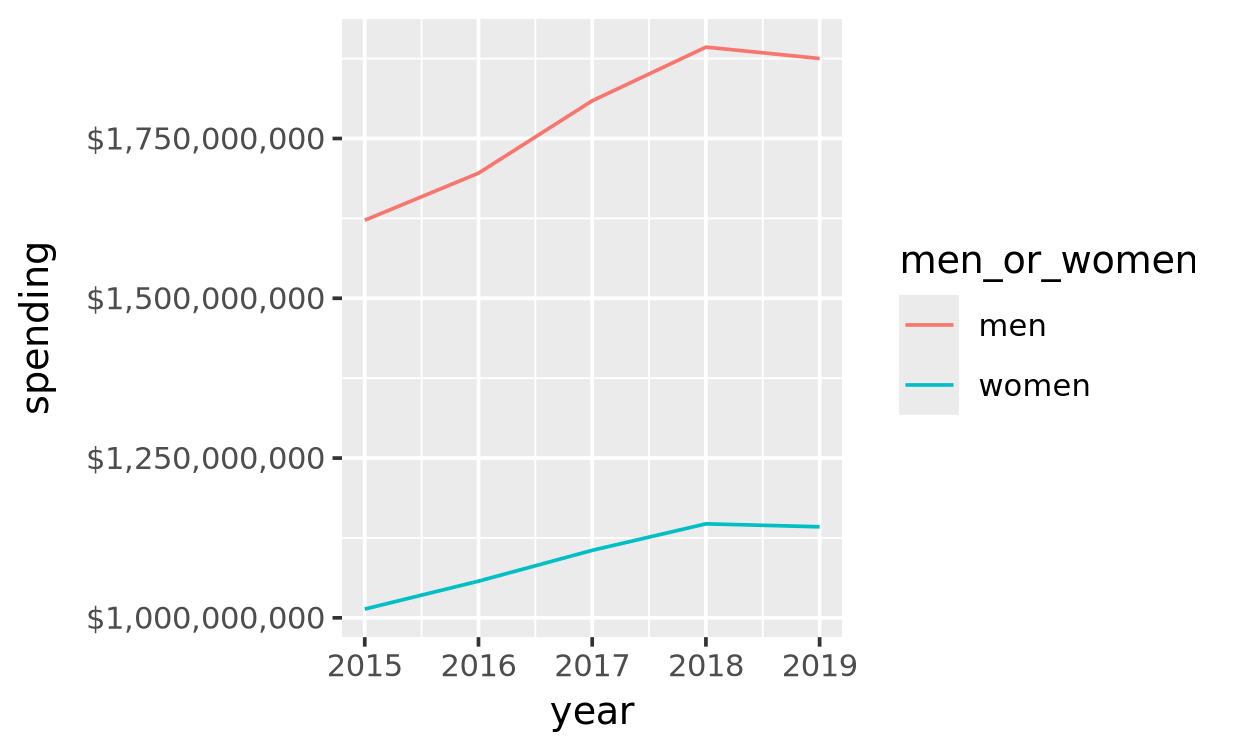

In [7]:
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 5) 


men_v_women_line = ggplot(ncaa_sports_spending2, aes(x = year,
                                               y = expenditure_usd, color = men_or_women)) +
              geom_line() +
              scale_y_continuous(labels = scales::dollar_format()) +
              labs(x = 'year', y = 'spending')

men_v_women_line








Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [8]:
unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
    filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    arrange(rev(men_or_women), expenditure_usd) |>
    mutate(sports = fct_inorder(sports)) |>
    select(year, institution_name, sports, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
    filter(!is.na(expenditure_usd))

Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

year,institution_name,sports,men_or_women,expenditure_usd
<dbl>,<chr>,<fct>,<chr>,<dbl>
2019,University of North Carolina at Chapel Hill,Fencing,women,212291
2019,University of North Carolina at Chapel Hill,Golf,women,729939
2019,University of North Carolina at Chapel Hill,Rowing,women,745952
2019,University of North Carolina at Chapel Hill,Gymnastics,women,1022938
2019,University of North Carolina at Chapel Hill,Tennis,women,1064746
2019,University of North Carolina at Chapel Hill,Swimming and Diving,women,1255235


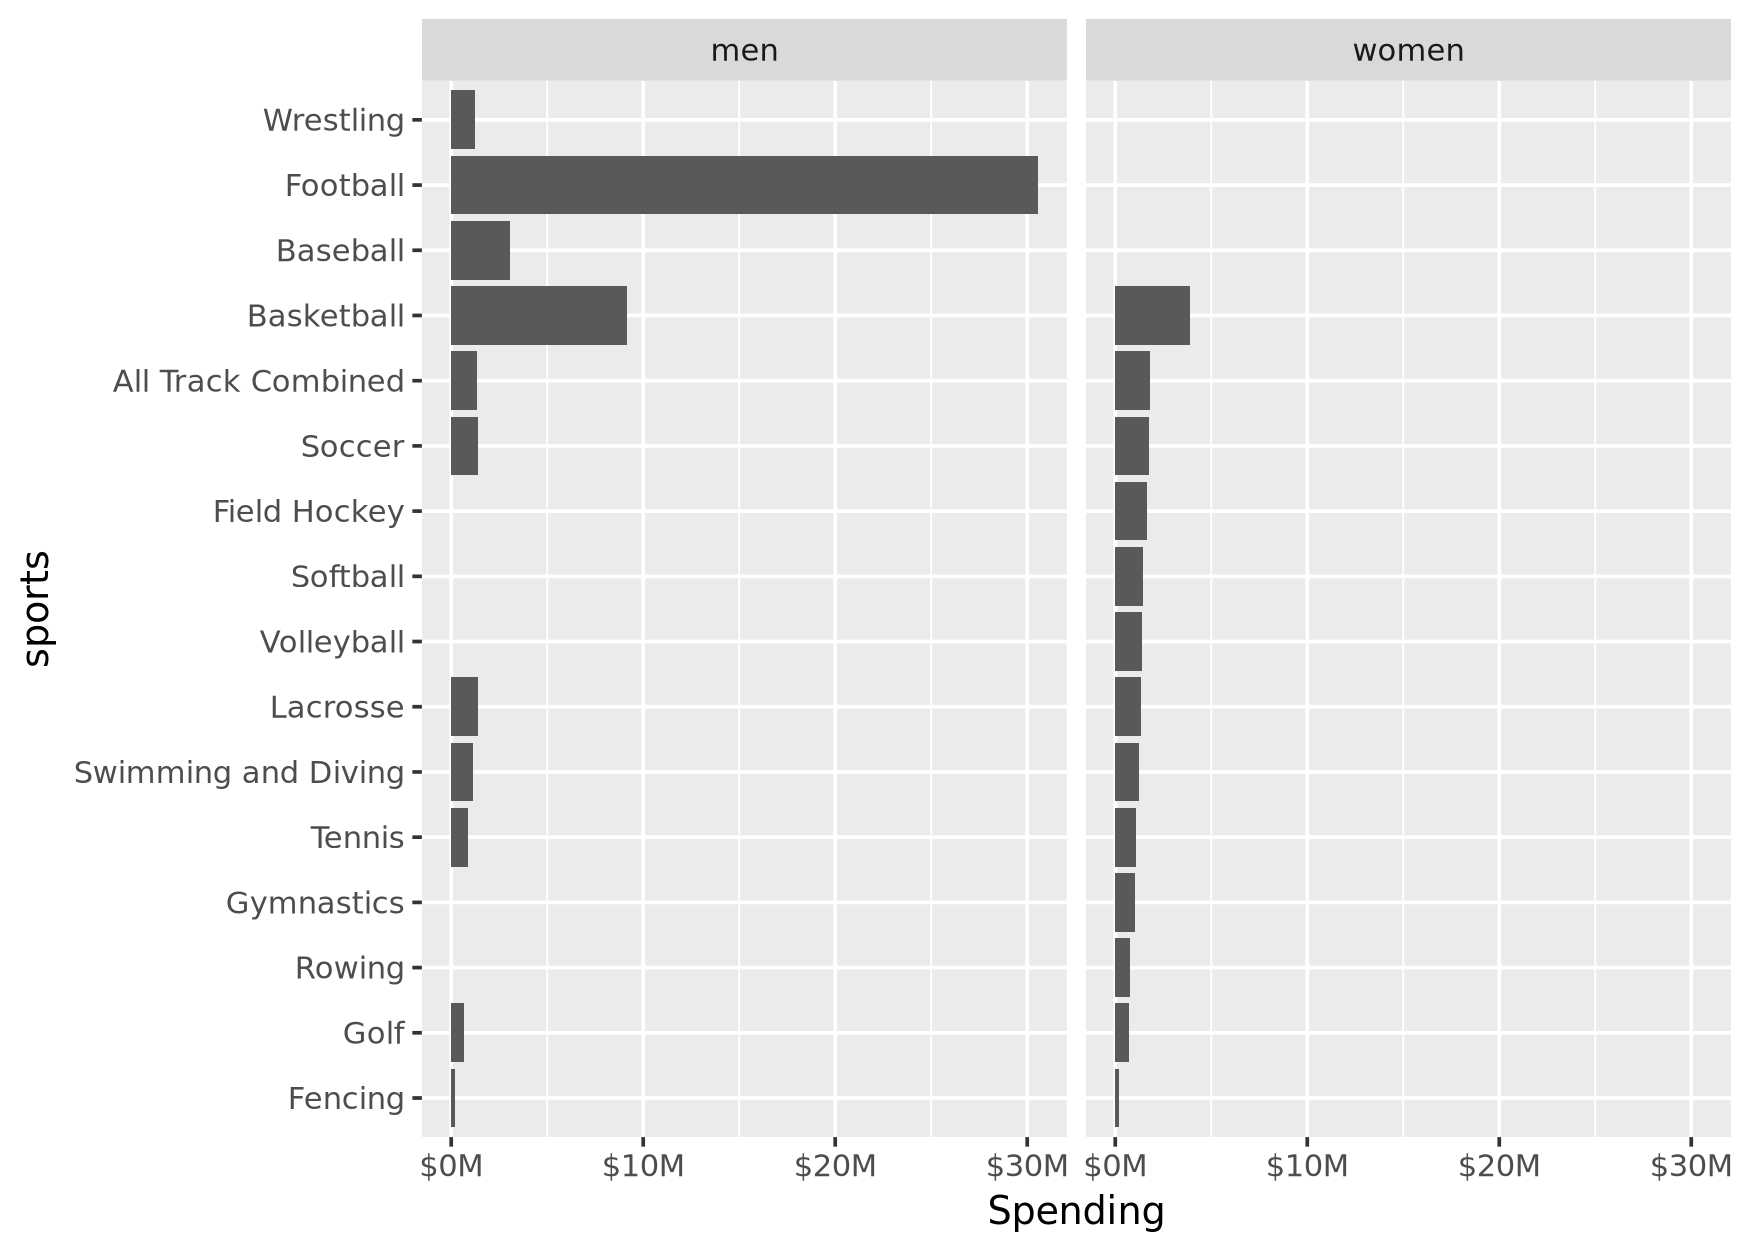

In [18]:
options(repr.plot.res = 250, repr.plot.height = 5, repr.plot.width = 7) 


unc_sports_spending_2019 |> head()


unc_spending = ggplot(unc_sports_spending_2019, aes(x = expenditure_usd / 1e6,
                                                    y = sports)) +
              geom_col(na.rm = T) +
              scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) +
              facet_wrap(~men_or_women, nrow = 1) +
              labs(x = 'Spending', y = 'sports') 

unc_spending




You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/unc_sports_spending.png). **Your chart does not need to look exactly like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

labs allows you to create custom labels for the x and y axis. x = 'Spending' changes the x axis label from "expenditure_usd" to "Spending"